In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier


In [2]:
# import pandas as pd
# import numpy as np

In [3]:
data=pd.read_csv('./DATASET/forestfiresareads.csv')

In [4]:
# Convert area interms of log for normalization
data.head()



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


# Area are so many 0 values so we will use log tranform to scale it

In [6]:


new_area=np.log(data.area+1)
data.drop(['area'],axis=1,inplace=True)
data['area']=new_area

In [7]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.000000


# Handling Mising Values

In [8]:
# Checking data type numeric or not

In [9]:
data.shape

(517, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [11]:
print(data.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [12]:
# month and day are object, convert the into numeric
data.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

### DAY AND MONTH ARE IN OBJ TYPES SO WE TRANSFORMED using LabelEncoder to number

In [14]:
from sklearn.preprocessing import LabelEncoder
month_new=LabelEncoder().fit_transform(data['month'])
day_new=LabelEncoder().fit_transform(data.day)
scrap=['month','day']
data.drop(scrap,axis=1,inplace=True)
data['month']=month_new
data['day']=day_new

In [15]:
# month and day are object, convert the into numeric
data.month.unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [16]:
data.day.unique()

array([0, 5, 2, 3, 1, 6, 4])

In [17]:
# # Convert month and day to number
# dict_month={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
# dict_day={'sun':1,'mon':2,'tue':3,'wed':4,'thu':5,'fri':6,'sat':7}
# dict_month(['jan'])

In [18]:
data.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month', 'day'],
      dtype='object')

In [19]:
# Check for  null values
data.isna().sum()

X        0
Y        0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
month    0
day      0
dtype: int64

In [20]:
# data.shape
data[data.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day


In [21]:
# print(data[data.duplicated()])
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool


In [22]:
data.describe(include = 'all')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026,5.758221,2.736944
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436,4.373275,1.925061
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,1.000000,1.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710,6.000000,3.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193,11.000000,4.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620,11.000000,6.000000


In [23]:
data.shape

(517, 13)

# Data Exploration

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

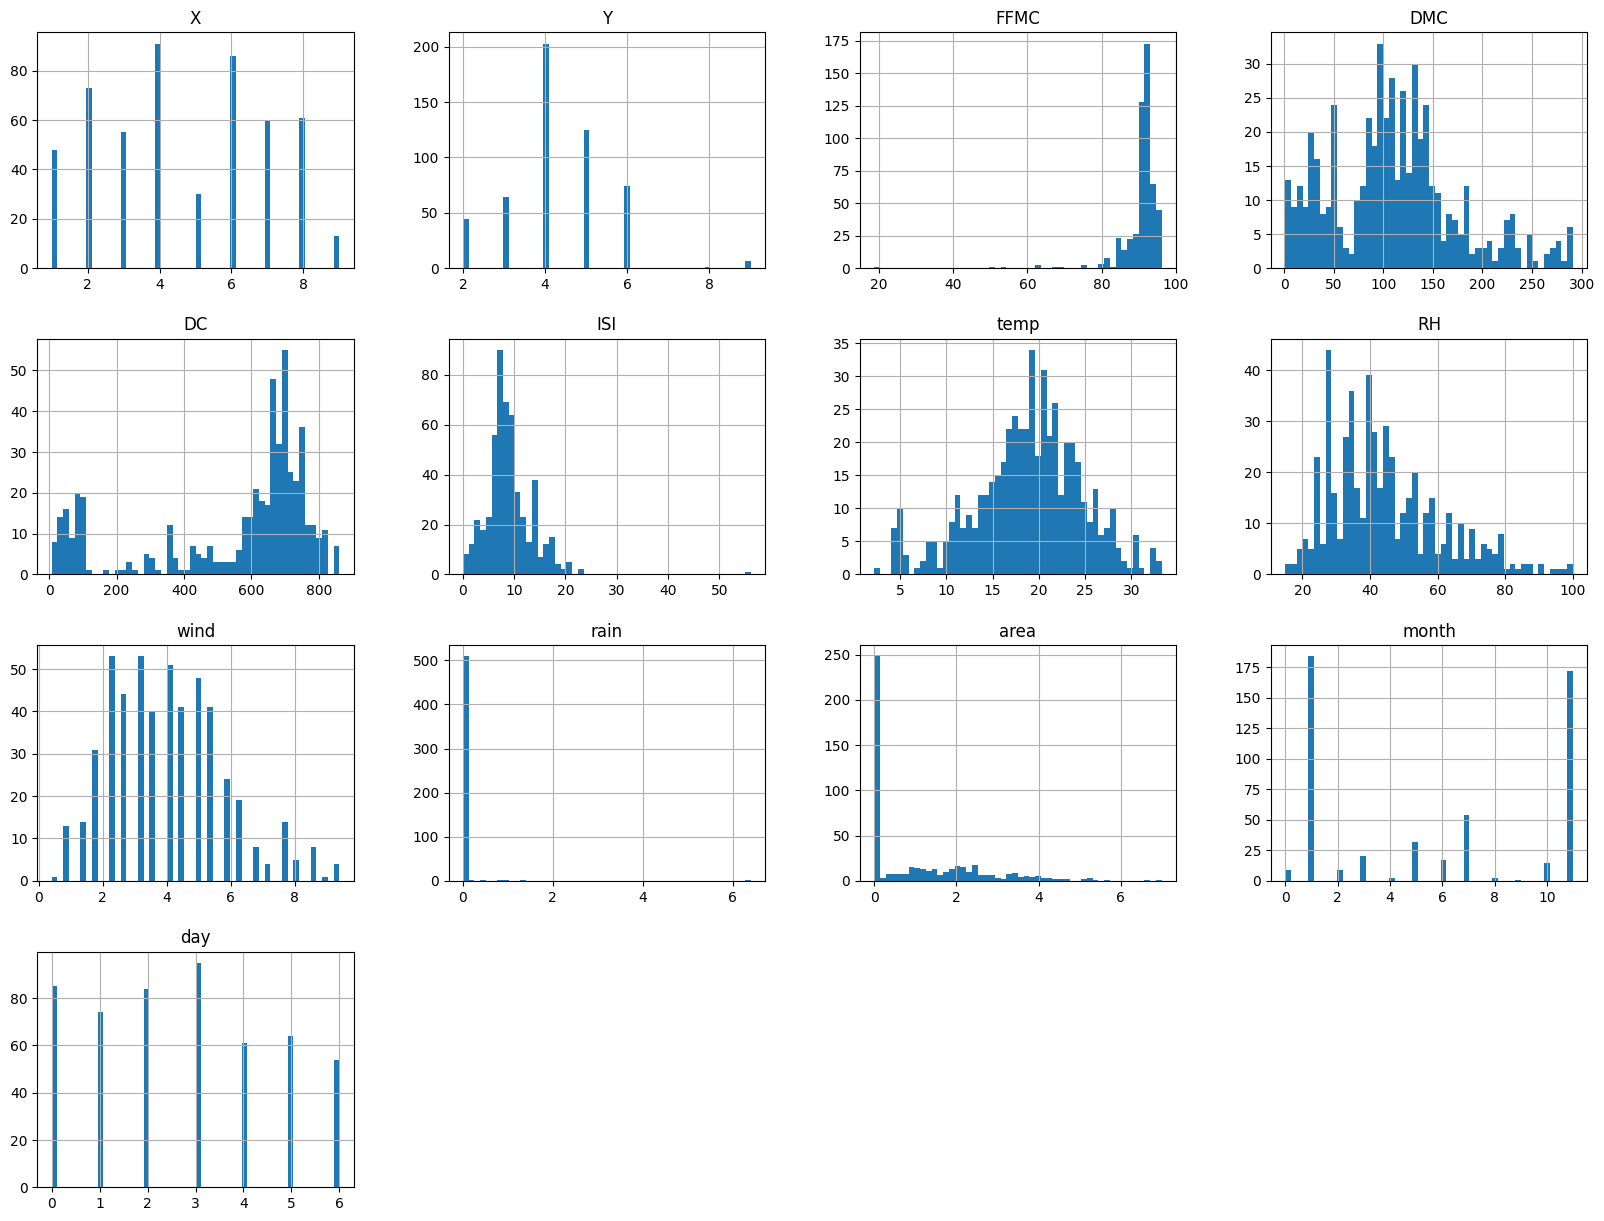

In [24]:
# # Histogram
data.hist(bins=50,figsize=(20,15))

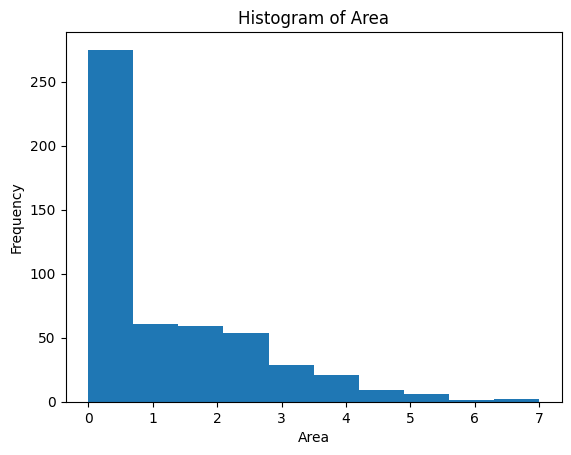

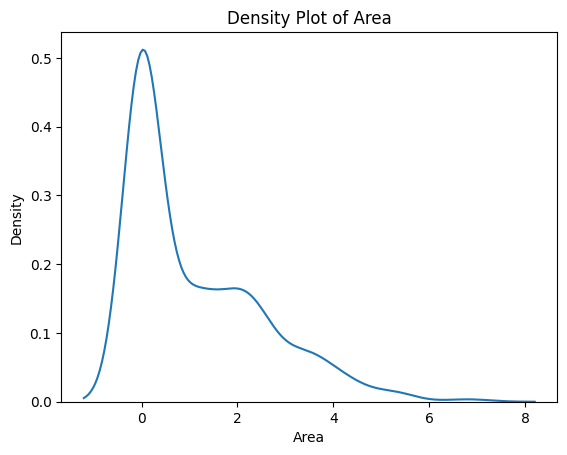

In [25]:
import seaborn as sns
# Creating a histogram
plt.hist(data["area"], bins=10)  # 10 intervals for the histogram
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.title("Histogram of Area")
plt.show()

# Creating a density plot
sns.kdeplot(data["area"])
plt.xlabel("Area")
plt.ylabel("Density")
plt.title("Density Plot of Area")
plt.show()

## It shows imbalance distribution of area or highly skewed

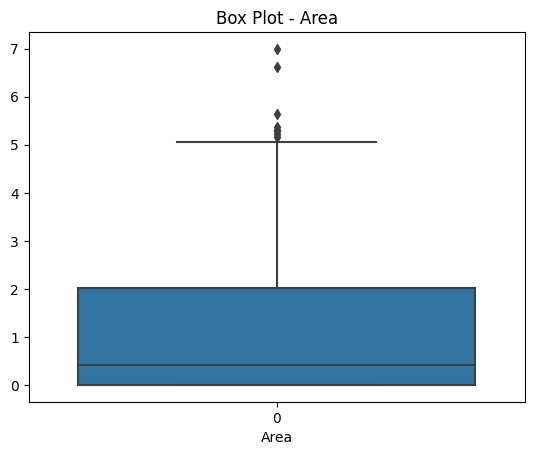

In [26]:
#  Creating a box plot for the "area" variable
sns.boxplot(data['area'])
plt.xlabel('Area')
plt.title('Box Plot - Area')
plt.show()

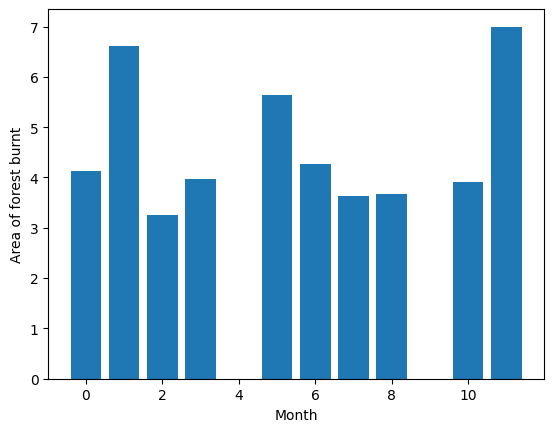

In [27]:
# Get the month and area of forest burnt features
month = data["month"]
area = data["area"]

# Create a bar chart of the number of fires that occurred in each month
plt.bar(month, area)
plt.xlabel("Month")
plt.ylabel("Area of forest burnt")
plt.show()

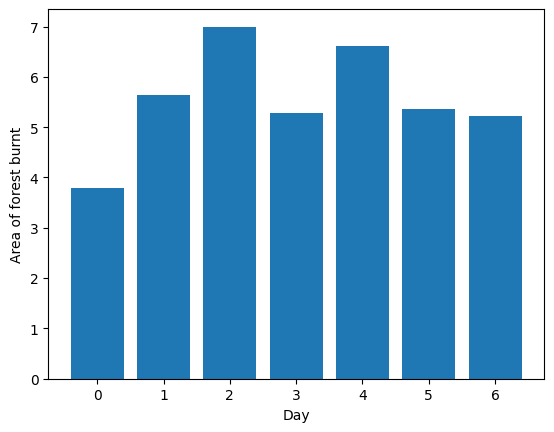

In [28]:
# Get the month and area of forest burnt features
day = data["day"]
area = data["area"]

# Create a bar chart of the number of fires that occurred in each month
plt.bar(day, area)
plt.xlabel("Day")
plt.ylabel("Area of forest burnt")
plt.show()



<Axes: xlabel='month', ylabel='count'>

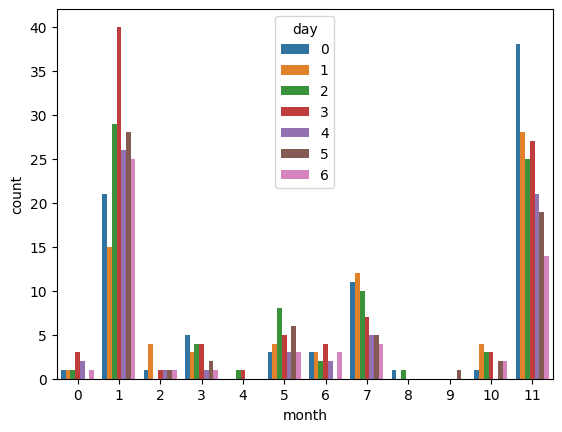

In [29]:
import seaborn as sns
sns.countplot(x='month', hue='day',data=data)

In [30]:
# sns.countplot(x='area', hue='day',data=data)

In [31]:
set=['month','day']
data_rough=data.drop(set,axis=1)
#month and days are not so imp to spread fire so we dropped
corr_matrix=data_rough.corr()
corr_matrix['area'].sort_values(ascending=False)


area    1.000000
DMC     0.067153
wind    0.066973
DC      0.066360
X       0.061995
temp    0.053487
FFMC    0.046799
Y       0.038838
rain    0.023311
ISI    -0.010347
RH     -0.053662
Name: area, dtype: float64

In [32]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026,5.758221,2.736944
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436,4.373275,1.925061
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,1.000000,1.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710,6.000000,3.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193,11.000000,4.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620,11.000000,6.000000


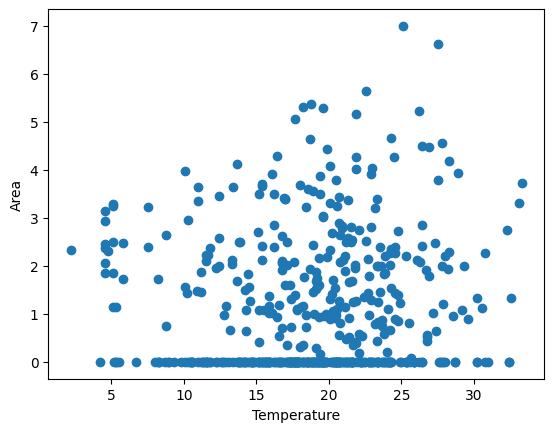

In [33]:

#  scatter plot of the temperature and area
plt.scatter(data["temp"], data["area"])
plt.xlabel("Temperature")
plt.ylabel("Area")
plt.show()

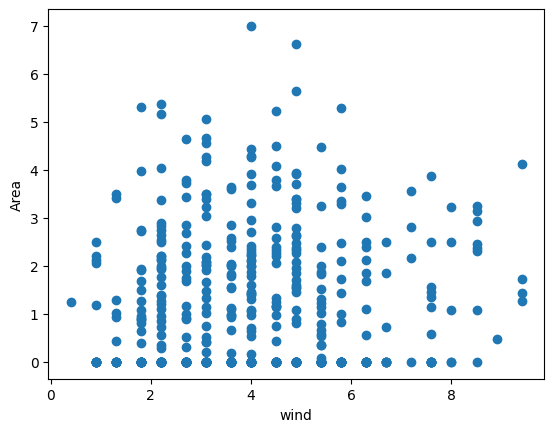

In [34]:
#  scatter plot of the wind and area
plt.scatter(data["wind"], data["area"])
plt.xlabel("wind")
plt.ylabel("Area")
plt.show()

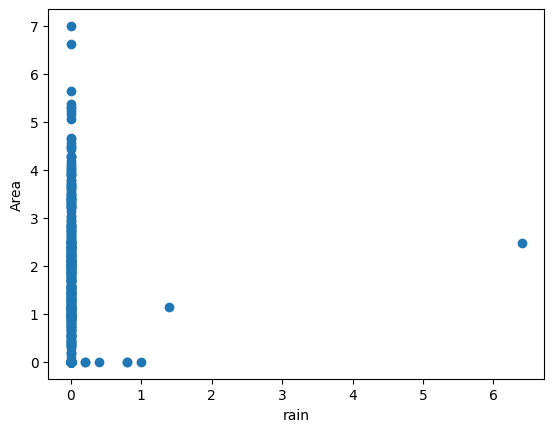

In [35]:
#  scatter plot of the rain and area
plt.scatter(data["rain"], data["area"])
plt.xlabel("rain")
plt.ylabel("Area")
plt.show()

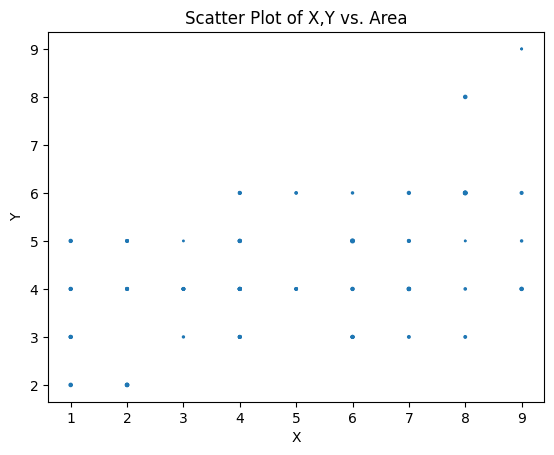

In [36]:

# Create a scatter plot of the X and Y features against the area of the fire
plt.scatter(data["X"], data["Y"], data["area"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of X,Y vs. Area")
plt.show()

Text(0, 0.5, 'Y-coordinate')

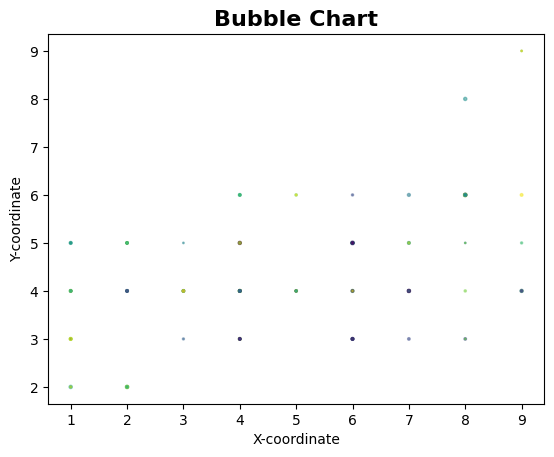

In [37]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig, ax = plt.subplots()

# Generate the bubble chart using scatter plot
ax.scatter(data.X, data.Y, s=data.area, c = np.random.rand(517), alpha=0.5)

# Customize the chart
ax.set_title('Bubble Chart', fontsize=16, fontweight='bold')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')

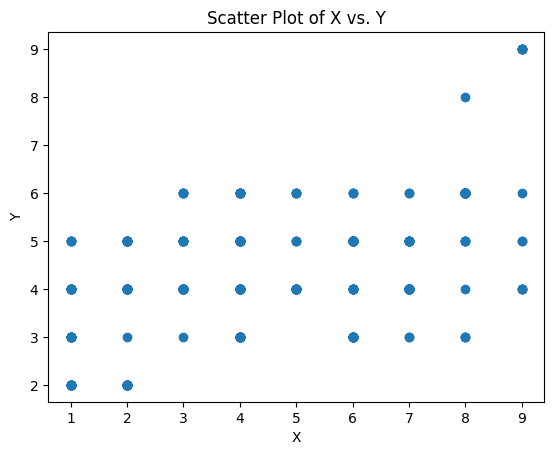

In [38]:
plt.scatter( data["X"], data["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of X vs. Y")
plt.show()

### It shows that not so strong relation between X,Y and area so we will drop X and Y also

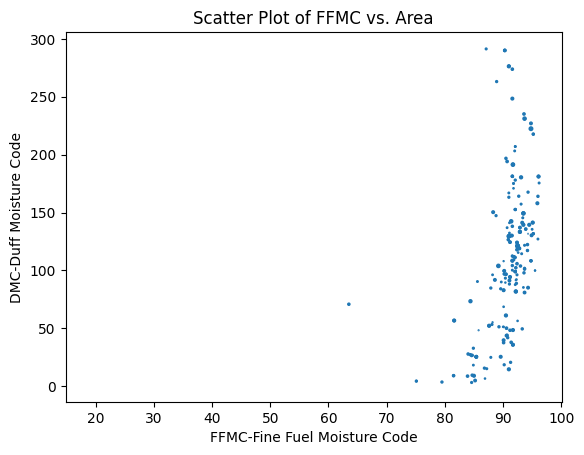

In [39]:
# Create a scatter plot of the FFMC-moisture content grass leaves and DMC-moisture content of dead plants features
# against the area of the fire
plt.scatter(data["FFMC"], data["DMC"], data["area"])
plt.xlabel("FFMC-Fine Fuel Moisture Code")
plt.ylabel("DMC-Duff Moisture Code")
plt.title("Scatter Plot of FFMC vs. Area")
plt.show()

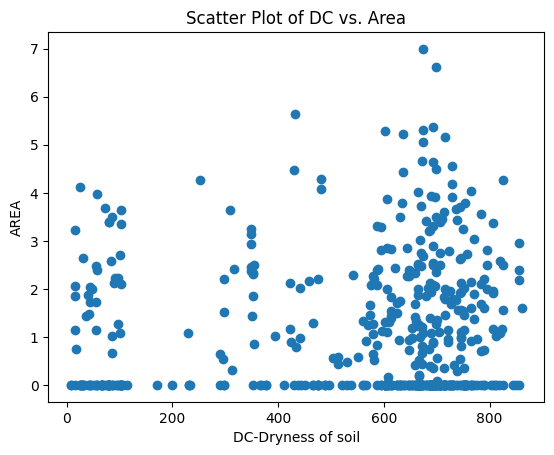

In [40]:
# Create a scatter plot of DC(Drought Code)dryness features against the area of the fire
plt.scatter(data["DC"], data["area"])
plt.xlabel("DC-Dryness of soil")
plt.ylabel("AREA")
plt.title("Scatter Plot of DC vs. Area")
plt.show()

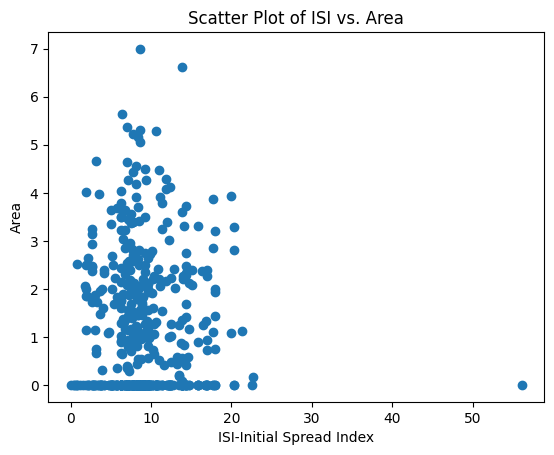

In [41]:
# Create a scatter plot of ISI-Initial Spread Index-is a measure of how easily a fire can spread.
  # features against the area of the fire
  
import matplotlib.pyplot as plt
plt.scatter(data["ISI"],data["area"])
plt.xlabel("ISI-Initial Spread Index")
plt.ylabel("Area")
plt.title("Scatter Plot of ISI vs. Area")
plt.show()

### It shows a negative correlation betn area and ISI

### WE CAN SEE PAIRPLOT AT ONCE:

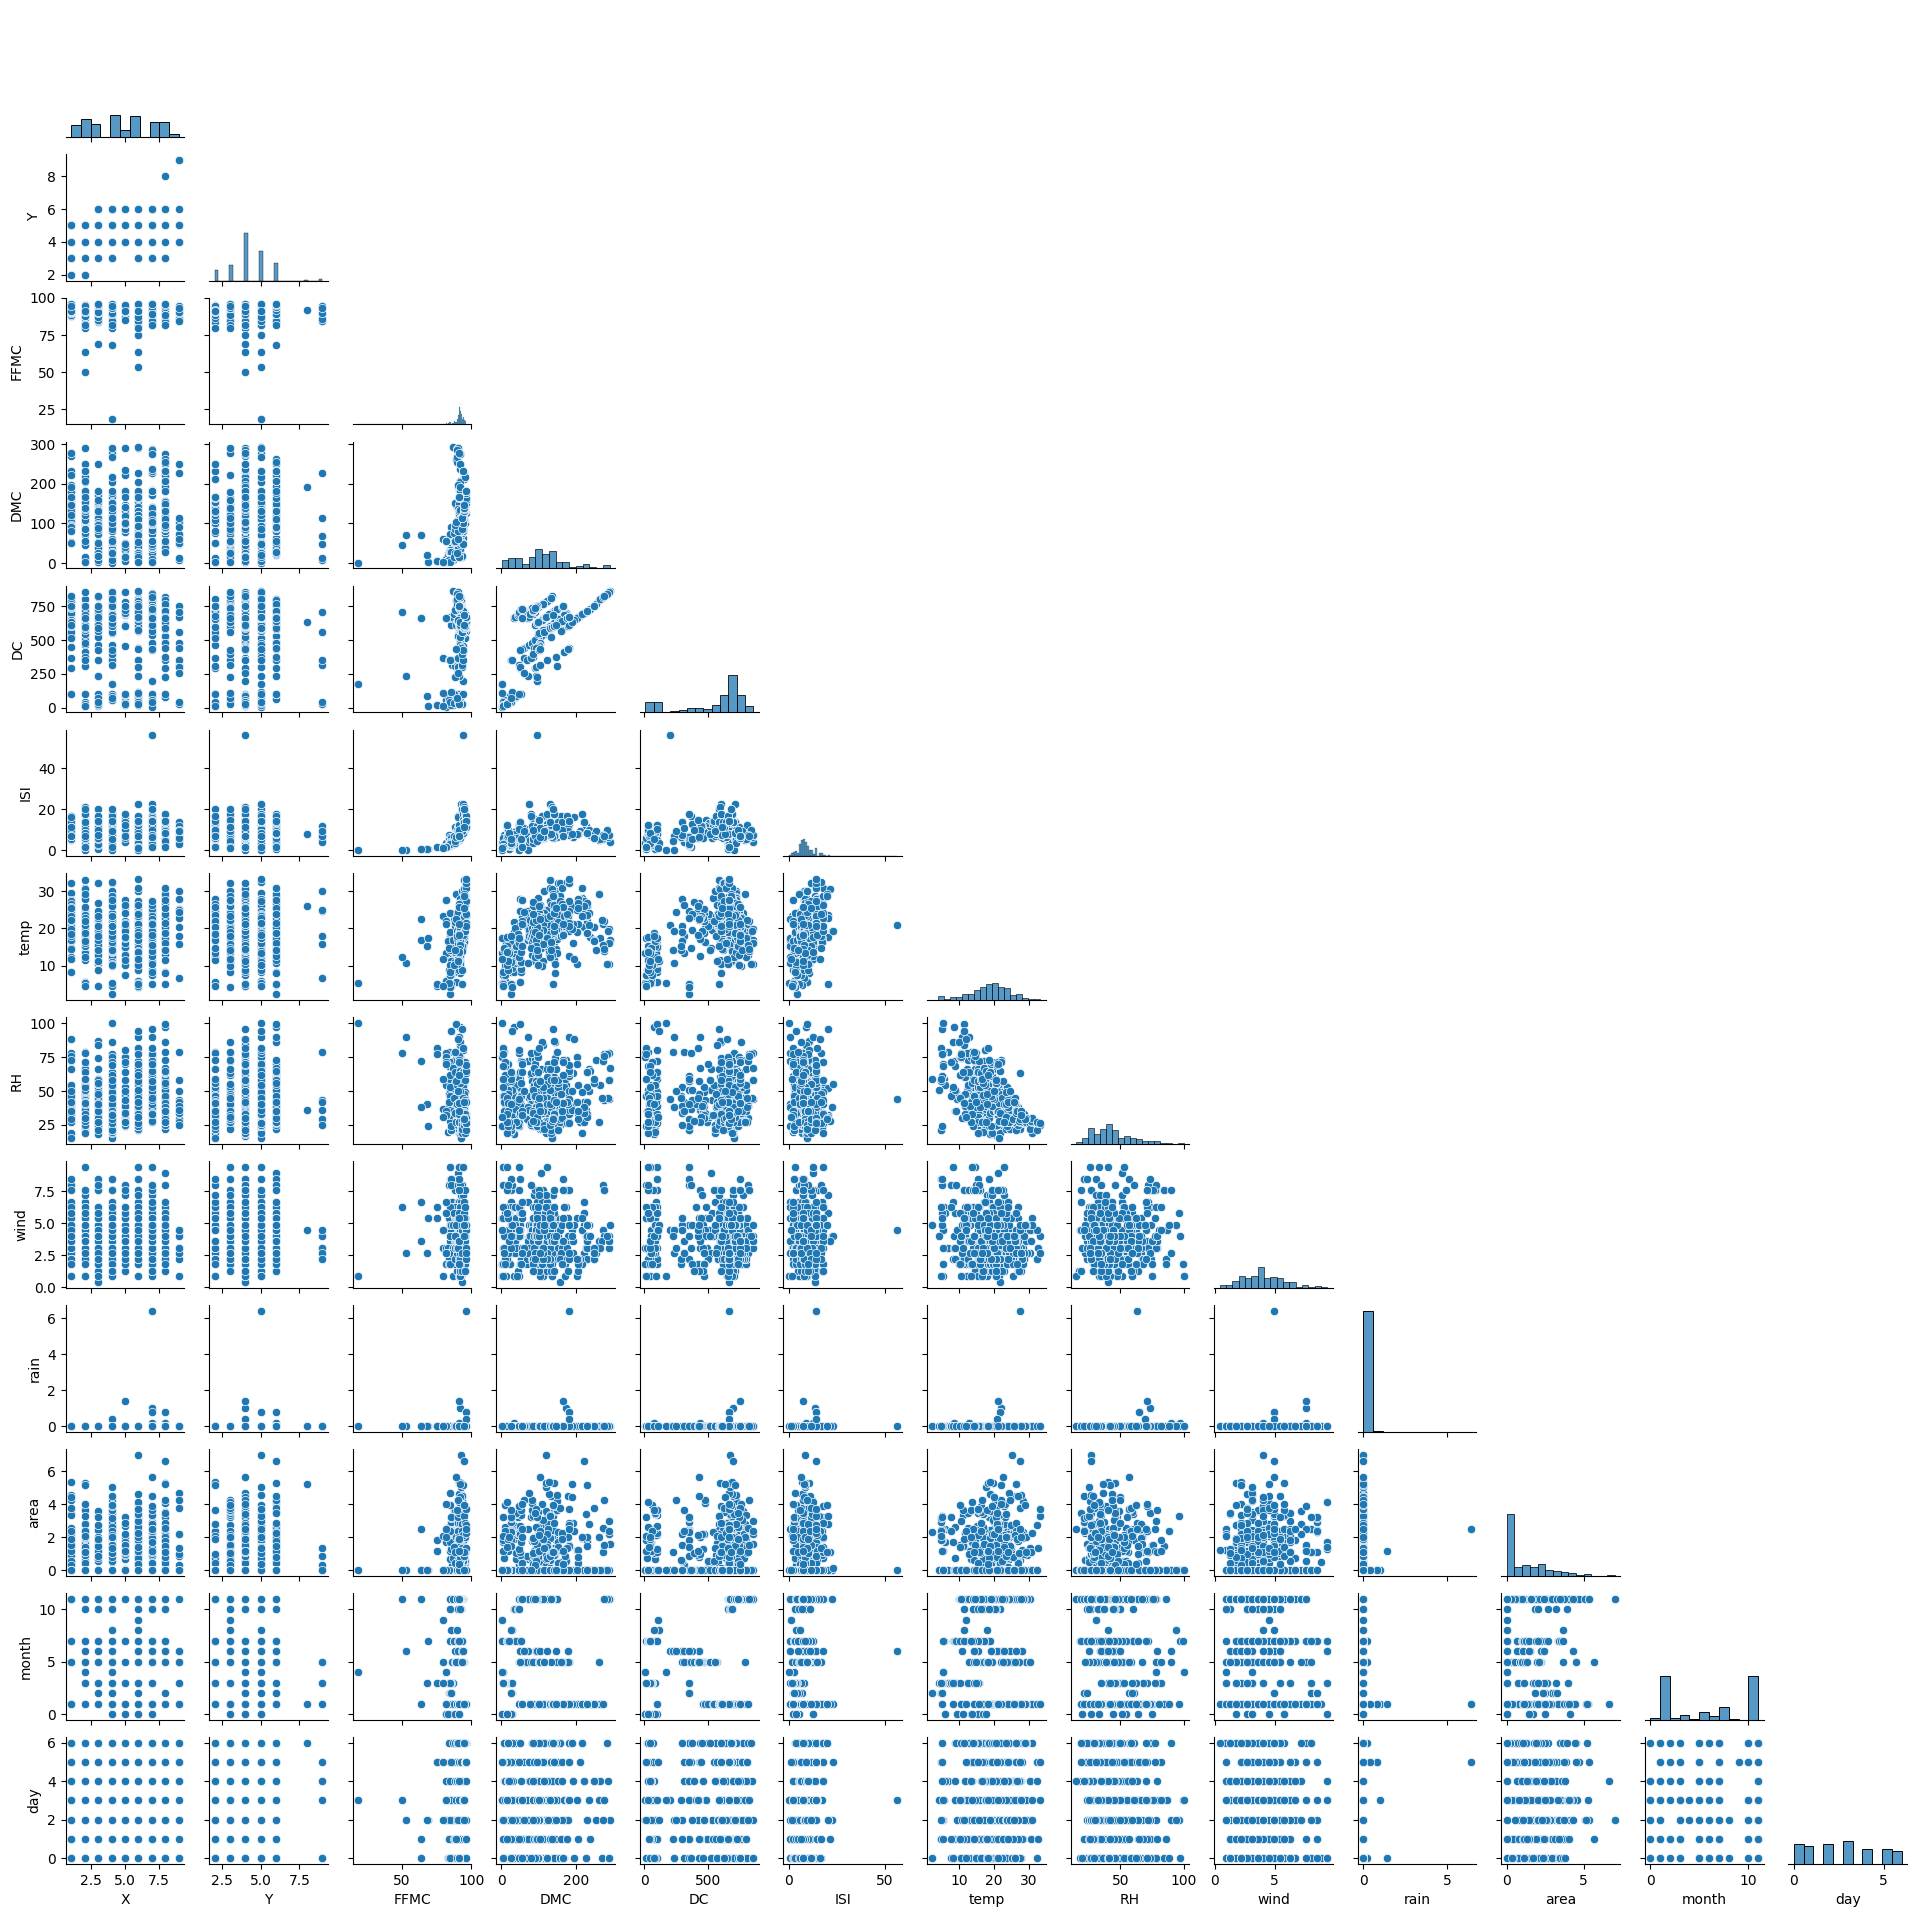

In [42]:
# Pairplot over target variable

sns.pairplot(data,height=1.5,corner=True)

# In scatterplot no single line can perfectly separate the data into respective class.
# So, non-linear models like DecisionTree, RandomForest, etc. may give better result than linear models like linear regression

### SCATTER_MATRIX

array([[<Axes: xlabel='FFMC', ylabel='FFMC'>,
        <Axes: xlabel='DC', ylabel='FFMC'>,
        <Axes: xlabel='area', ylabel='FFMC'>,
        <Axes: xlabel='temp', ylabel='FFMC'>,
        <Axes: xlabel='DMC', ylabel='FFMC'>,
        <Axes: xlabel='RH', ylabel='FFMC'>,
        <Axes: xlabel='ISI', ylabel='FFMC'>,
        <Axes: xlabel='wind', ylabel='FFMC'>,
        <Axes: xlabel='rain', ylabel='FFMC'>],
       [<Axes: xlabel='FFMC', ylabel='DC'>,
        <Axes: xlabel='DC', ylabel='DC'>,
        <Axes: xlabel='area', ylabel='DC'>,
        <Axes: xlabel='temp', ylabel='DC'>,
        <Axes: xlabel='DMC', ylabel='DC'>,
        <Axes: xlabel='RH', ylabel='DC'>,
        <Axes: xlabel='ISI', ylabel='DC'>,
        <Axes: xlabel='wind', ylabel='DC'>,
        <Axes: xlabel='rain', ylabel='DC'>],
       [<Axes: xlabel='FFMC', ylabel='area'>,
        <Axes: xlabel='DC', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='temp', ylabel='area'>,
        <Axes: xla

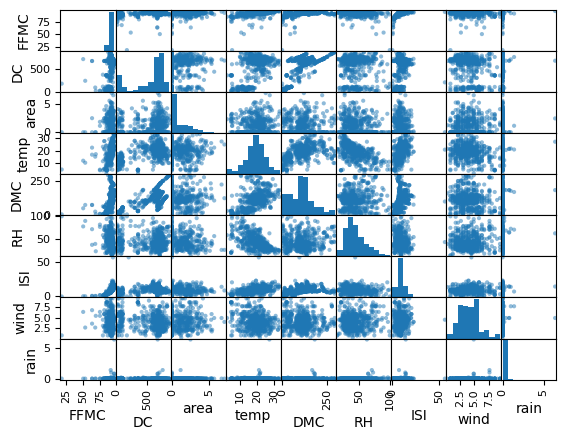

In [44]:
from pandas.plotting import scatter_matrix

attributes=['FFMC','DC','area','temp','DMC','RH','ISI','wind','rain']
scatter_matrix(data[attributes])

In [45]:
# from the plot above, we can draw an insiht that low paid employee
# are more likely to leave.
correlation = data.corr()
correlation_values=correlation['area'].sort_values(ascending=False)
print(correlation_values)
# correlation

area     1.000000
DMC      0.067153
wind     0.066973
DC       0.066360
X        0.061995
temp     0.053487
FFMC     0.046799
month    0.039974
Y        0.038838
day      0.028812
rain     0.023311
ISI     -0.010347
RH      -0.053662
Name: area, dtype: float64


<Axes: >

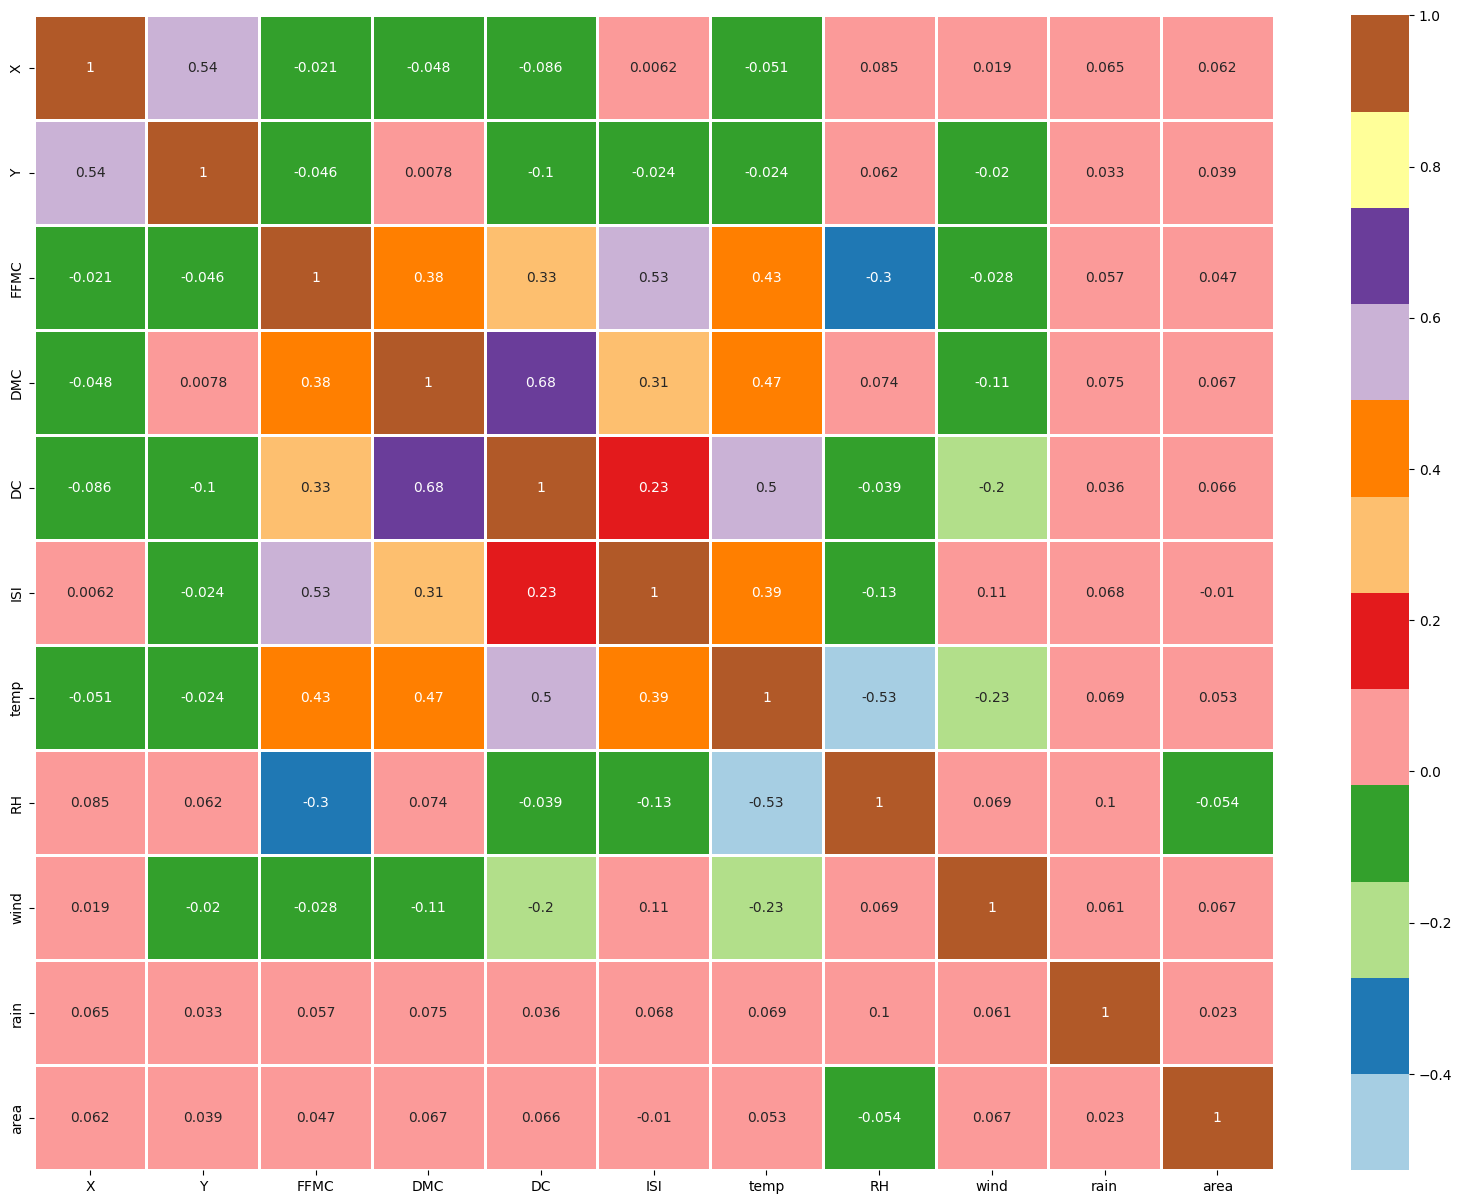

In [ ]:
plt.figure(figsize=(20,15))  #size of figure
sns.heatmap(correlation,annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")
     

# Conclusion drawn from Data Exploration

In [46]:
# So, we will be using following variables(features) as independent variables for our model.

data=data[['FFMC','DC','DMC','ISI','temp','wind','rain','RH','area']]
data=data[data['area']>0].copy()
data.shape

(270, 9)

# Training and Testing Model
This is regression---> will use all the regression algorithms, first make train and test sets.

In [47]:
x = data[['FFMC','DC','DMC','ISI','temp','wind','rain','RH']]
y = data[['area']]
x.head()

,FFMC,DC,DMC,ISI,temp,wind,rain,RH
138,85.8,313.4,48.3,3.9,18.0,2.7,0.0,42
139,91.0,692.6,129.5,7.0,21.7,2.2,0.0,38
140,90.9,686.5,126.5,7.0,21.9,1.8,0.0,39
141,95.5,513.3,99.9,13.2,23.3,4.5,0.0,31
142,90.1,529.8,108.0,12.5,21.2,8.9,0.0,51


# Train-Test split of data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
X_train.head()

,FFMC,DC,DMC,ISI,temp,wind,rain,RH
222,87.6,103.8,52.2,5.0,11.0,5.8,0.0,46
484,94.9,587.1,130.3,14.1,33.1,4.0,0.0,25
230,92.9,699.6,133.3,9.2,26.4,4.5,0.0,21
397,91.6,613.0,181.3,7.6,24.3,3.6,0.0,33
273,84.4,353.5,27.2,6.8,4.8,8.5,0.0,57


In [ ]:
# del data,x,y
# # to free up memory usage

In [52]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


  
  

# Train and Evaluation function

In [53]:
from sklearn.model_selection import GridSearchCV

def train(X_train, y_train, model, hyperparameters):
    grid_search = GridSearchCV(estimator=model,param_grid=hyperparameters, cv = 5)
    grid_search.fit(X_train, y_train)
    
    
    #print the best hyperparameters found
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    
    # Train the model with best hyperparametres
    best_model = model.set_params(**best_params)  #Direct#best_model = grid_search.best_estimator_

    best_model.fit(X_train, y_train)

    # Print the intercept and coefficients of the best model
    # print('Intercept is :', best_model.best_estimator_.intercept_)
    # print('Coefficient is :', best_model.best_estimator_.coef_)

    # Evaluate the best model on the test data
    scores = best_model.score(X_test, y_test)
    print('Score_test_data:', scores)
    
    return best_params, best_model


  ### Evaluate model

In [54]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

def evaluate_model(X_test, y_test, best_model):
    # measure with test data
    # returns rmse score
    
    # prediction of test set
    y_pred=best_model.predict(X_test)
    
    # calculate evaluation metrics
    mse=mean_squared_error(y_test,y_pred)
    print("MSE:",mse)
    rmse=np.sqrt(mse)
    print('RMSE scores: ',rmse)
    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE:',mae)

def another_evaluation_way(x_test, y_test, best_model):
    scores=cross_val_score(best_model,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
    rmse=np.sqrt(-scores)
    
#     print('rmse scores: ',rmse)
    print('rmse with CV mean: ',rmse.mean())
    print('rmse with CV standard deviation: ',rmse.std())

# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
hyperparameters={
    # 'n_neighbors': [7,9,10,11],
    # 'weights': ['uniform', 'distance']
}
model1=LinearRegression()
_,best_model1 = train(X_train, y_train, model1,hyperparameters)
evaluate_model(X_test, y_test, best_model1)
another_evaluation_way(X_test, y_test, best_model1)

Best Hyperparameters: {}
Score_test_data: -0.10687746354500449
MSE: 1.6120326027392702
RMSE scores:  1.2696584590901878
MAE: 1.0406131794529945
rmse with CV mean:  1.2926397186978777
rmse with CV standard deviation:  0.2239604743336494


In [63]:
# input and output real
features=x.iloc[-5:]
labels=y.iloc[-5:]
print(features)
print(labels)
real=np.exp(labels)-1

     FFMC     DC    DMC  ISI  temp  wind  rain  RH
509  91.0  752.6  166.9  7.1  21.1   7.6   1.4  71
510  91.0  752.6  166.9  7.1  18.2   5.4   0.0  62
512  81.6  665.6   56.7  1.9  27.8   2.7   0.0  32
513  81.6  665.6   56.7  1.9  21.9   5.8   0.0  71
514  81.6  665.6   56.7  1.9  21.2   6.7   0.0  70
         area
509  1.153732
510  0.357674
512  2.006871
513  4.012592
514  2.498152


In [69]:
# Input and output calculated
# Model-1
raw_area1=best_model1.predict(features)
predicted_area1=(np.exp(raw_area1))-1

print("real area:\n",real)
print(f"\npredicted_area by LinearRegressor :\n {predicted_area1}")



real area:
       area
509   2.17
510   0.43
512   6.44
513  54.29
514  11.16

predicted_area by LinearRegressor :
 [[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# HuberREgressor

In [74]:
from sklearn.linear_model import HuberRegressor
# Create a grid of hyperparameters
hyperparameters = {
    'epsilon': [1.0, 1.35, 1.7,2,4],
     'alpha': [0.00001,0.0001, 0.001, 0.01]
     }
# Create a Huber regressor
model_robust = HuberRegressor()
_,best_model2 = train(X_train,y_train,model_robust,hyperparameters)
scores = evaluate_model(X_test,y_test,best_model2)  
another_evaluation_way(X_test, y_test, best_model2) 

C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWar

Best Hyperparameters: {'alpha': 0.001, 'epsilon': 1.0}
Score_test_data: -0.09094972327341821
MSE: 1.5888357833519395
RMSE scores:  1.2604902948265566
MAE: 1.0109288566763184


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWar

rmse with CV mean:  1.3371757244930074
rmse with CV standard deviation:  0.24837274118287953


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [75]:
# Input and output calculated
raw_area=best_model2.predict(features)
predicted_area=(np.exp(raw_area))-1


# print("Best algorithm: ",min())
print("real area:\n",real)
print(f"\npredicted_area by HuberRegressor :\n {predicted_area}")


real area:
       area
509   2.17
510   0.43
512   6.44
513  54.29
514  11.16

predicted_area by HuberRegressor :
 [-1. -1. -1. -1. -1.]


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(


# LASSO

In [77]:
from sklearn.linear_model import Lasso
# Define the hyperparameters to tune
hyperparameters = {
    "alpha": np.logspace(-4, 4, 10),
}

# Create a Lasso model
model3 = Lasso()
_,best_model3 = train(X_train,y_train,model3,hyperparameters)
scores = evaluate_model(X_test,y_test,best_model3)  
another_evaluation_way(X_test, y_test, best_model3) 

Best Hyperparameters: {'alpha': 0.046415888336127774}
Score_test_data: -0.07572564930837355
MSE: 1.5666637684844884
RMSE scores:  1.2516643993037784
MAE: 1.027315167529394
rmse with CV mean:  1.24453858444371
rmse with CV standard deviation:  0.22298058810552956


In [78]:
# Input and output calcu
raw_area=best_model2.predict(features)
predicted_area=(np.exp(raw_area))-1
print("real area:\n",real)
print(f"\npredicted_area by Lasso Regression :\n {predicted_area}")

real area:
       area
509   2.17
510   0.43
512   6.44
513  54.29
514  11.16

predicted_area by Lasso Regression :
 [17.91903171 63.92316722  2.5119818  -0.99020392 -0.98763544]


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


# Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

# Defining the hyperparameters to tune
hyperparameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Create a decision tree regressor
model4 = DecisionTreeRegressor()
_,best_model4 = train(X_train,y_train,model4,hyperparameters)
scores = evaluate_model(X_test,y_test,best_model4)   

another_evaluation_way(X_test, y_test, best_model4)

C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be remov

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score_test_data: -0.037898764671293605
MSE: 1.511573504834405
RMSE scores:  1.2294606560742012
MAE: 0.9988147703274716
rmse with CV mean:  1.2229822785532396
rmse with CV standard deviation:  0.21360990851202027


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be remov

In [80]:
# Input and output calculat
raw_area=best_model2.predict(features)
predicted_area=(np.exp(raw_area))-1
print("real area:\n",real)
print(f"\npredicted_area by DecisionTReeRegressor :\n {predicted_area}")

real area:
       area
509   2.17
510   0.43
512   6.44
513  54.29
514  11.16

predicted_area by DecisionTReeRegressor :
 [17.91903171 63.92316722  2.5119818  -0.99020392 -0.98763544]


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


# Random Forest Regressor

In [81]:
# #  Defining the hyperparameter grid to search
hyperparameters = {
    'n_estimators': [100, 200, 300],      # Number of decision trees
    'max_depth': [None, 5, 10],            # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt'],      # Maximum number of features to consider
    'bootstrap': [True, False]             # Whether to use bootstrap samples
}
model5=RandomForestRegressor()
_,best_model5 = train(X_train, y_train, model5,hyperparameters)
evaluate_model(X_test, y_test, best_model5)
another_evaluation_way(X_test, y_test, best_model5)

C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
Score_test_data: -0.13245548650826033
MSE: 1.6492838869042998
RMSE scores:  1.2842444809709326
MAE: 1.0435869647354161
rmse with CV mean:  1.294858920311232
rmse with CV standard deviation:  0.18218439718712484


In [82]:
#Input and output calculate
raw_area=best_model2.predict(features)
predicted_area=(np.exp(raw_area))-1
print("real area:\n",real)
print(f"\npredicted_area RandomForestRegressor :\n {predicted_area}")

real area:
       area
509   2.17
510   0.43
512   6.44
513  54.29
514  11.16

predicted_area RandomForestRegressor :
 [17.91903171 63.92316722  2.5119818  -0.99020392 -0.98763544]


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [86]:
from sklearn import svm

hyperparameters={
    'C': [1,2,3],
    'kernel':['linear','poly','rbf','sigmoid'],
}

model6=svm.SVR()
_,best_model6 = train(X_train, y_train, model6, hyperparameters)
evaluate_model(X_test, y_test, best_model6)
another_evaluation_way(X_test, y_test, best_model6)

C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWar

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Score_test_data: -0.09221391644374854
MSE: 1.5906769271766639
RMSE scores:  1.261220411814154
MAE: 1.0110099706261508
rmse with CV mean:  1.319488428211683
rmse with CV standard deviation:  0.25662488195497707


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
#Input and output calculate
raw_area=best_model2.predict(features)
predicted_area=(np.exp(raw_area))-1
print("real area:\n",real)
print(f"\npredicted_area by Support Vector Machine :\n {predicted_area}")

real area:
       area
509   2.17
510   0.43
512   6.44
513  54.29
514  11.16

predicted_area by Support Vector Machine :
 [17.91903171 63.92316722  2.5119818  -0.99020392 -0.98763544]


C:\Users\Damodar Kafle\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


# Plotting actual vs predicted

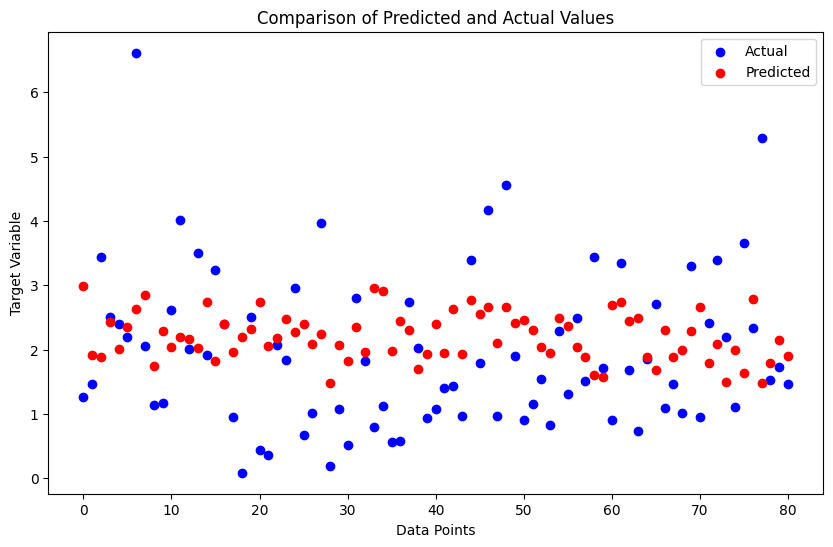

In [88]:
# Make predictions on the test set
y_pred = best_model5.predict(X_test)

# Plot the predicted values and the actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

# Deep learning Implementation

In [92]:
# ## DEEP LEARNING 

# from numpy import sqrt
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# # determine the number of input features
# n_features = x_train.shape[1]

# # define model
# model = Sequential()
# model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(1))

# # compile the model
# model.compile(optimizer='adam', loss='mse')

# # fit the model
# model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1)

# # evaluate the model
# error = model.evaluate(x_test, y_test, verbose=1)
# print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.3-cp310-abi3-win_amd64.whl (422 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached wrapt-1.14.1-cp311-cp311-win_amd64.whl
  Using cached grp

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Damodar Kafle\\AppData\\Roaming\\Python\\Python311\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.



ModuleNotFoundError: No module named 'tensorflow'